                                                        FLIGHT PRICE PREDICTION

                                     MODELS - XGBoost, Gradient Boosting, Random Forest, Feed Forward Neural Network

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Measurements 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [122]:
#read data
data = pd.read_excel("Data_Train.xlsx")

In [123]:
#Displaying first five records of training dataset
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [125]:
data.shape

(10683, 11)

In [126]:
#checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [127]:
#drop row with null values
data.dropna(inplace = True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

                                                    Feature Engineering

In [128]:
#Extract Journey day from date of journey
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [129]:
#Extract journey month
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [130]:
#Drop Data_Of_Journey as it has been converted
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [131]:
# Convert Departure Time
# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

C:\Users\morey\AppData\Local\Temp\ipykernel_29624\996438849.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour


In [132]:
#Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

C:\Users\morey\AppData\Local\Temp\ipykernel_29624\4017540500.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute


In [133]:
# Drop Dep_Time
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [134]:
#Convert Arrival Time
# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
#Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

C:\Users\morey\AppData\Local\Temp\ipykernel_29624\770678692.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
C:\Users\morey\AppData\Local\Temp\ipykernel_29624\770678692.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute


In [135]:
#Drop Arrival_time
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [136]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [137]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [138]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [139]:
#Drop Duration
data.drop(["Duration"], axis = 1, inplace = True)

In [140]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [141]:
#Find the categorical columns
category_col=[column for column in data.columns if data[column].dtype=='object']
category_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [142]:
categorical = data[category_col]

In [143]:
#Drop Additional info as it no valid data
data.drop(['Additional_Info'], axis = 1, inplace = True)

In [144]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [145]:
#Perform one-hot encoding on airline column
Airline=pd.get_dummies(categorical['Airline'],drop_first=True, dtype='int64')

In [146]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [147]:
data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [148]:
#encoding of source column
source = data[["Source"]]
source=pd.get_dummies(source,drop_first=True, dtype='int64')
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [149]:
data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [150]:
#Destination has values New Delhi and Delhi. Since both are same places, combining the data into single column
destination = data[["Destination"]]
Current_Destination_List = destination['Destination']
New_Destination_List = []
for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)
    destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
destination = pd.get_dummies(destination, drop_first = True, dtype='int64')
destination.head()

C:\Users\morey\AppData\Local\Temp\ipykernel_29624\1091498864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  destination['Destination'] = pd.DataFrame(New_Destination_List)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [151]:
data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [152]:
data['Route1']=categorical['Route'].str.split('→').str[0]
data['Route2']=categorical['Route'].str.split('→').str[1]
data['Route3']=categorical['Route'].str.split('→').str[2]
data['Route4']=categorical['Route'].str.split('→').str[3]
data['Route5']=categorical['Route'].str.split('→').str[4]

In [153]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [154]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops           0
Price                 0
Journey_day           0
Journey_month         0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_min           0
Duration_hours        0
Duration_mins         0
Route1                0
Route2                0
Route3             3491
Route4             9116
Route5            10636
dtype: int64

In [155]:
for i in ['Route3', 'Route4', 'Route5']:
  data[i].fillna('None',inplace=True)

In [156]:
data.isnull().sum()

Airline           0
Source            0
Destination       0
Route             0
Total_Stops       0
Price             0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
Route1            0
Route2            0
Route3            0
Route4            0
Route5            0
dtype: int64

In [157]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [158]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    data[i]=encoder.fit_transform(data[i])

In [159]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


In [160]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [161]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [162]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


In [163]:
# Concatenate dataframe --> data + Airline + Source + Destination

data_train = pd.concat([data, Airline, source, destination], axis = 1)

In [164]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,...,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,0,13,29,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,2,25,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,3,32,4,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25,2,34,3,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45,0,34,8,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [165]:
pd.set_option('display.max_columns',35)
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,...,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,0,13,29,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,2,25,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,3,32,4,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25,2,34,3,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45,0,34,8,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [166]:
data_train.drop(["Airline", "Source", "Destination", "Route"], axis = 1, inplace = True)

In [167]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [168]:
data_train.shape

(10682, 34)

In [169]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [170]:
#Features are copied to X
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [171]:
#Price copied to y
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

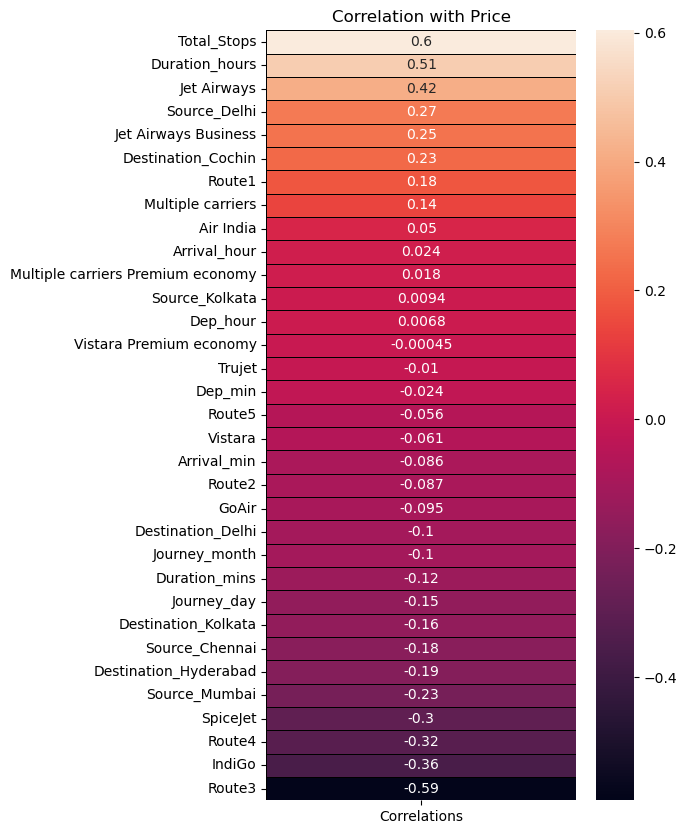

In [172]:
#Plotting correlation with price
corr = X.corrwith(y).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with Price');

# XGBoost Model

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [174]:
xgboost_model = XGBRegressor()

xgboost_model.fit(X_train, y_train)

C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [175]:
print(xgboost_model.score(X_train, y_train))

0.9413567256343084


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

MAE: 1091.905
MSE:  2790238.792
RMSE:  1670.401
R2:  0.863


<Axes: xlabel='Price', ylabel='Count'>

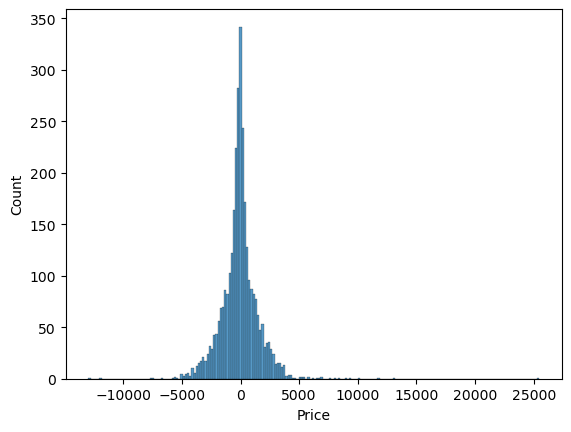

In [176]:
y_pred = xgboost_model.predict(X_test)

mae_xgb = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
print("MAE:", mae_xgb)

mse_xgb = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("MSE: ", mse_xgb)

rmse_xgb = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse_xgb)

r2_xgb = float(format(r2_score(y_test, y_pred), '.3f'))
print("R2: ", r2_xgb)

#Frequency distribution of residual error
sns.histplot(y_test-y_pred)


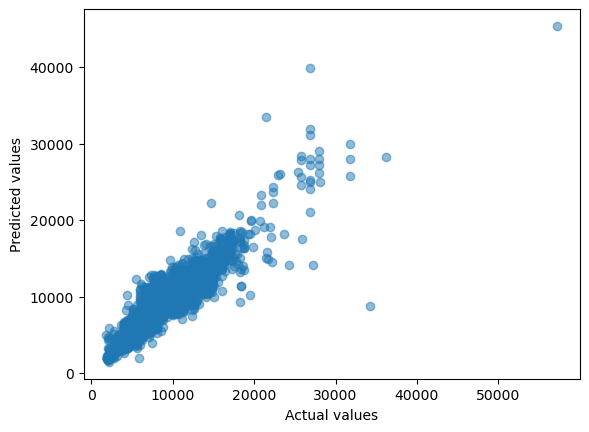

In [177]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [178]:
xgb_importance = xgboost_model.feature_importances_
xgb_names = xgboost_model.feature_names_in_

xgb_imp = pd.DataFrame({"feature_names" : xgb_names, 
                               "xgb_importances" : xgb_importance.round(3)})
xgb_imp['xgb_impt_rank'] = xgb_imp['xgb_importances'].rank(method='dense', ascending=False)

In [179]:
xgb_imp.sort_values('xgb_importances', ascending=False).head(10)

,feature_names,xgb_importances,xgb_impt_rank
18,Jet Airways Business,0.379,1.0
7,Duration_hours,0.143,2.0
17,Jet Airways,0.099,3.0
0,Total_Stops,0.054,4.0
16,IndiGo,0.041,5.0
9,Route1,0.034,6.0
28,Source_Mumbai,0.033,7.0
19,Multiple carriers,0.029,8.0
27,Source_Kolkata,0.028,9.0
21,SpiceJet,0.020,10.0


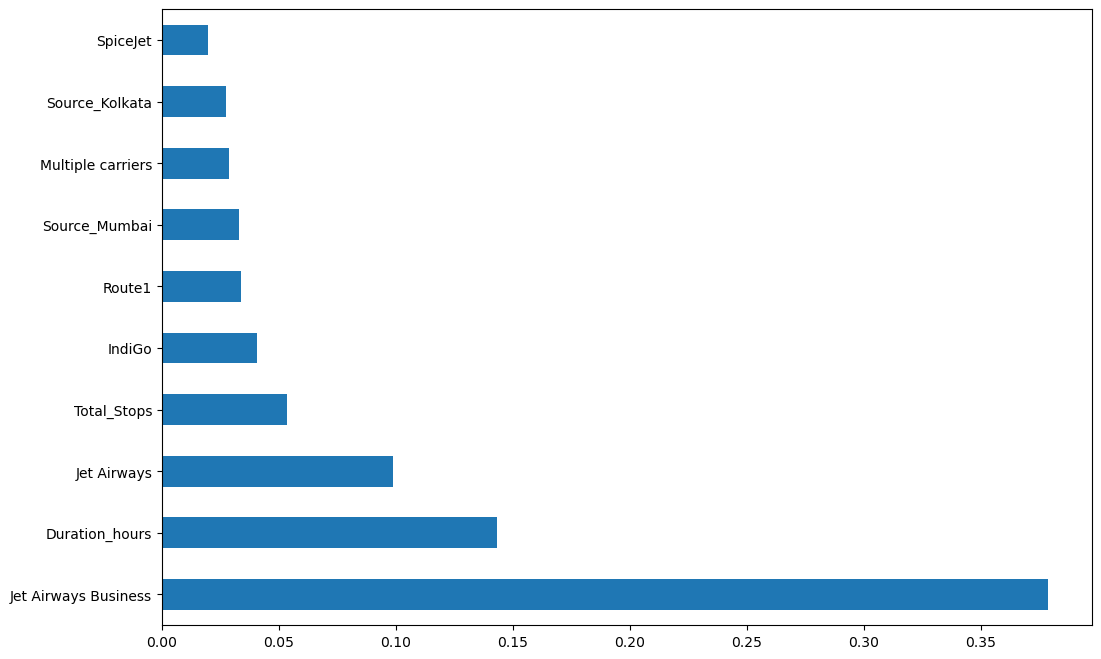

In [180]:
# Plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(xgb_importance, index=xgb_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

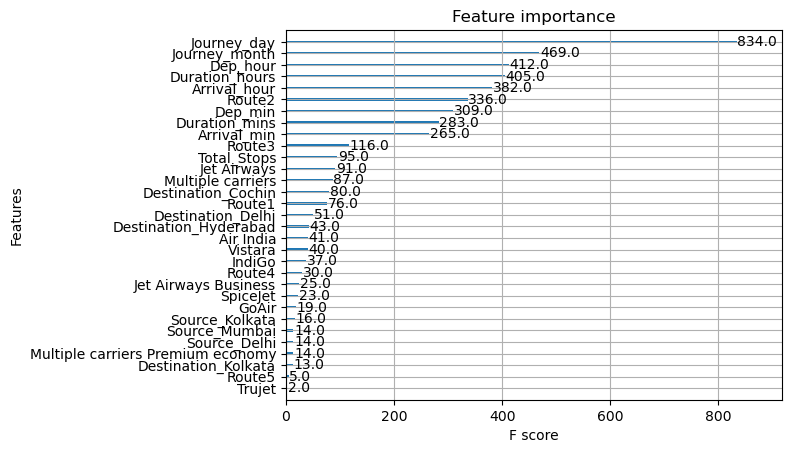

In [181]:
#feature importance using xgboost library plot_importance
xgb.plot_importance(xgboost_model)
plt.show()

Route5 and Trujet has least feature importance score. The reason is that both of them have mostly null values. 

In [182]:
#Feature selection by dropping Route5 and Trujet. Copy data to new variables
X1 = X_train
y1 = y_train
X1_test = X_test
y1_test = y_test

In [183]:
X1.drop(["Route5","Trujet"], axis = 1, inplace = True)
X1_test.drop(["Route5","Trujet"], axis = 1, inplace = True)

X1

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
749,0,27,6,10,20,11,50,1,30,1,19,29,13,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6077,0,21,6,17,10,19,40,2,30,2,5,29,13,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2373,1,27,5,15,0,1,30,10,30,3,7,6,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2442,1,9,5,22,40,10,40,12,0,2,14,3,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5402,2,9,6,19,45,19,15,23,30,3,0,4,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,27,3,9,0,4,25,19,25,3,7,6,13,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5191,1,9,5,14,5,20,45,6,40,2,7,3,13,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5390,1,15,5,12,50,1,30,12,40,3,7,6,13,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
860,0,3,3,0,40,3,25,2,45,0,13,29,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [184]:
#Model to train after dropping Route5 and Trujet
xgboost_model_fs = XGBRegressor()

xgboost_model_fs.fit(X1, y1)

C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [185]:
#Predicting after feature selection
y_pred1 = xgboost_model_fs.predict(X1_test)

mae = float(format(mean_absolute_error(y1_test, y_pred1), '.3f'))
print("MAE:", mae)

mse = float(format(mean_squared_error(y1_test, y_pred1), '.3f'))
print("MSE: ", mse)

rmse = float(format(np.sqrt(mean_squared_error(y1_test, y_pred1)), '.3f'))
print("RMSE: ", rmse)

r2 = float(format(r2_score(y1_test, y_pred1), '.3f'))
print("R2: ", r2)

MAE: 1095.076
MSE:  2854621.228
RMSE:  1689.562
R2:  0.86


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

Not much improvement in model after removing features which have least importance

 Cross fold validation for xgboost

In [186]:
from sklearn.model_selection import KFold, cross_val_score
# Set up XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',  # root mean squared error as the evaluation metric
}

In [187]:
# Create an XGBoost regression model
model = xgb.XGBRegressor(**params)

In [188]:
# Set up cross-validation. The no of folds is 5
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

In [189]:
# Perform cross-validation and get RMSE scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = [-(score) for score in cv_scores]
rmse_scores = [(-score)**0.5 for score in cv_scores] 

C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

In [190]:
# Display cross-validation results and take the average of the scores
print("Cross-validation RMSE scores:", rmse_scores)
print("Average RMSE:", sum(rmse_scores) / len(rmse_scores))
print("Cross-validation MSE scores:", mse_scores)
mse_cv_xgb = sum(mse_scores) / len(mse_scores)
print("Average MSE:", mse_cv_xgb)

Cross-validation RMSE scores: [1787.308009948595, 2022.6243500543264, 2246.2927769988796, 1975.4281526911157, 1768.68188476255]
Average RMSE: 1960.0670348910935
Cross-validation MSE scores: [3194469.922426407, 4091009.261432687, 5045831.2399973385, 3902316.386444634, 3128235.609487206]
Average MSE: 3872372.483957655


Hyperparameter tuning for XGBoost

In [191]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate" : [0.01,0.02,0.04, 0.05,0.06,0.07],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [192]:
xgb_model_tuned = RandomizedSearchCV(estimator = xgboost_model, param_distributions = params, scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [193]:
xgb_model_tuned.fit(X_train, y_train)

C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.02, max_depth=8, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.02, max_depth=8, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.02, max_depth=8, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.02, max_depth=8, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.02, max_depth=8, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.04, max_depth=15, min_child_weight=1; total time=   0.4s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.04, max_depth=15, min_child_weight=1; total time=   0.4s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.04, max_depth=15, min_child_weight=1; total time=   0.4s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.04, max_depth=15, min_child_weight=1; total time=   0.4s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.04, max_depth=15, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.06, max_depth=6, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.06, max_depth=6, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.06, max_depth=6, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.06, max_depth=6, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.06, max_depth=6, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.07, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.07, max_depth=5, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.07, max_depth=5, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.07, max_depth=5, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.07, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.06, max_depth=4, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.06, max_depth=4, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.06, max_depth=4, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.06, max_depth=4, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.06, max_depth=4, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=12, min_child_weight=3; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=12, min_child_weight=3; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=12, min_child_weight=3; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=12, min_child_weight=3; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.02, max_depth=12, min_child_weight=3; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.04, max_depth=8, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.04, max_depth=8, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.04, max_depth=8, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.04, max_depth=8, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.04, max_depth=8, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.04, max_depth=10, min_child_weight=5; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.04, max_depth=10, min_child_weight=5; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.04, max_depth=10, min_child_weight=5; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.04, max_depth=10, min_child_weight=5; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.04, max_depth=10, min_child_weight=5; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.1s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.06, max_depth=5, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.07, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.07, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.07, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.07, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.07, max_depth=10, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.02, max_depth=4, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.02, max_depth=4, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.02, max_depth=4, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.02, max_depth=4, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.02, max_depth=4, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=5; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.06, max_depth=3, min_child_weight=5; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.06, max_depth=10, min_child_weight=3; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.06, max_depth=10, min_child_weight=3; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.06, max_depth=10, min_child_weight=3; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.06, max_depth=10, min_child_weight=3; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.06, max_depth=10, min_child_weight=3; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.04, max_depth=10, min_child_weight=7; total time=   0.2s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.07, max_depth=5, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.07, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.07, max_depth=5, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.07, max_depth=5, min_child_weight=7; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.07, max_depth=5, min_child_weight=7; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=3; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=3; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=3; total time=   0.4s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=3; total time=   0.4s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=3; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.07, max_depth=4, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.07, max_depth=4, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.07, max_depth=4, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.07, max_depth=4, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.07, max_depth=4, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.06, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.06, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.06, max_depth=3, min_child_weight=3; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.06, max_depth=3, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.06, max_depth=3, min_child_weight=3; total time=   0.0s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.02, max_depth=15, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.02, max_depth=15, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.02, max_depth=15, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.02, max_depth=15, min_child_weight=7; total time=   0.3s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.02, max_depth=15, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.07, max_depth=12, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.07, max_depth=12, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.07, max_depth=12, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.07, max_depth=12, min_child_weight=7; total time=   0.2s


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

[CV] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.07, max_depth=12, min_child_weight=7; total time=   0.2s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=30, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.05, 0.06, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [194]:
xgb_model_tuned.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [195]:
y_pred = xgb_model_tuned.predict(X_test)
mae = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
print("MAE:", mae)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse)
mse = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("MSE: ", mse)
r2 = float(format(r2_score(y_test, y_pred), '.3f'))
print("R2: ", r2)


MAE: 1085.746
RMSE:  1738.913
MSE:  3023818.311
R2:  0.852


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

No significant improvement after doing hyperparameter tuning. Only a small decrease in MAE value. Tried changing the parameters and number of iterations but couldn't observe much change.

# Gradient Boosting

In [196]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

MAE: 1441.759
MSE:  4115334.019
RMSE:  2028.629
R2:  0.798


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

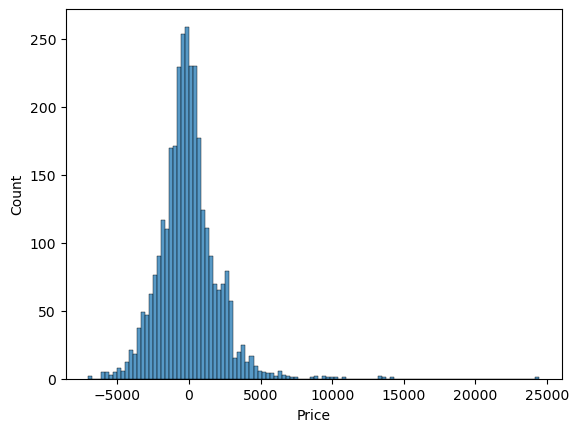

In [197]:
mae_gb = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
print("MAE:", mae_gb)
mse_gb = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("MSE: ", mse_gb)
rmse_gb = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse_gb)
r2_gb = float(format(r2_score(y_test, y_pred), '.3f'))
print("R2: ", r2_gb)
sns.histplot(y_test-y_pred)

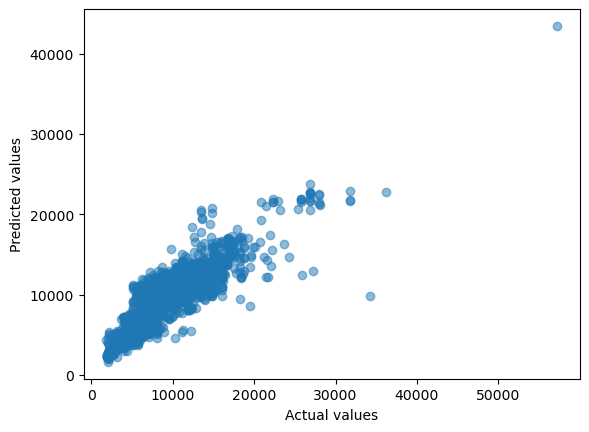

In [198]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [199]:
#Feature importance score
gbr_importance = gbr.feature_importances_
gbr_names = gbr.feature_names_in_

gbr_imp = pd.DataFrame({"feature_names" : gbr_names, "gbr_importances" : gbr_importance.round(3)})
gbr_imp['gbr_impt_rank'] = gbr_imp['gbr_importances'].rank(method='dense', ascending=False)

In [200]:
gbr_imp.sort_values('gbr_importances', ascending=False).head(10)

,feature_names,gbr_importances,gbr_impt_rank
7,Duration_hours,0.478,1.0
1,Journey_day,0.112,2.0
17,Jet Airways Business,0.085,3.0
16,Jet Airways,0.082,4.0
2,Journey_month,0.067,5.0
15,IndiGo,0.027,6.0
12,Route4,0.026,7.0
11,Route3,0.024,8.0
10,Route2,0.020,9.0
5,Arrival_hour,0.017,10.0


In [201]:
#Storing variables in the database to be accessible by other notebooks
%store mse_xgb mae_xgb rmse_xgb r2_xgb mse_cv_xgb  mse_gb mae_gb rmse_gb r2_gb

Stored 'mse_xgb' (float)
Stored 'mae_xgb' (float)
Stored 'rmse_xgb' (float)
Stored 'r2_xgb' (float)
Stored 'mse_cv_xgb' (float64)
Stored 'mse_gb' (float)
Stored 'mae_gb' (float)
Stored 'rmse_gb' (float)
Stored 'r2_gb' (float)


Random Forest
                                             


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)


# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared Score: {r2_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")


Mean Squared Error: 3872622.786680584
R-squared Score: 0.810174171667002
Mean Absolute Error: 1131.0946090887705
Root Mean Squared Error: 1967.8980630816689


In [203]:
#Cross-validation
cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-Validation Mean Squared Error Scores:")
print(cv_mse_scores)
print(f"Mean CV MSE: {np.mean(cv_mse_scores)}")
print(f"Standard Deviation CV MSE: {np.std(cv_mse_scores)}")
mse_cv_rf=np.mean(cv_mse_scores)


test_r2 = rf_regressor.score(X_test, y_test)
print(f"R-squared Score on Test Set: {test_r2}")

Cross-Validation Mean Squared Error Scores:
[3891850.69412963 3785188.60705627 3276342.90033358 3382501.83286038
 4809478.17863418]
Mean CV MSE: 3829072.442602808
Standard Deviation CV MSE: 542585.9495993473
R-squared Score on Test Set: 0.810174171667002


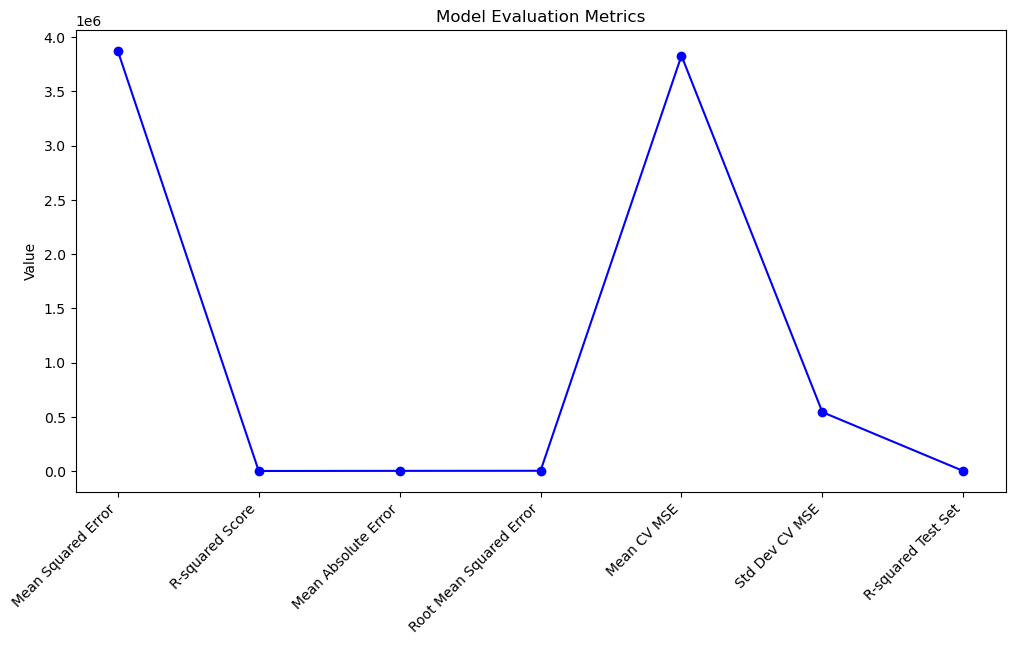

In [204]:
# Plot line graph for evaluation metrics
evaluation_metrics = {'Mean Squared Error': mse_rf,
                      'R-squared Score': r2_rf,
                      'Mean Absolute Error': mae_rf,
                      'Root Mean Squared Error': rmse_rf,
                      'Mean CV MSE': np.mean(cv_mse_scores),
                      'Std Dev CV MSE': np.std(cv_mse_scores),
                      'R-squared Test Set': test_r2}

plt.figure(figsize=(12, 6))
plt.plot(list(evaluation_metrics.keys()), list(evaluation_metrics.values()), marker='o', linestyle='-', color='b')
plt.title('Model Evaluation Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [205]:
%store mse_rf mae_rf rmse_rf r2_rf mse_cv_rf 

Stored 'mse_rf' (float64)
Stored 'mae_rf' (float64)
Stored 'rmse_rf' (float64)
Stored 'r2_rf' (float64)
Stored 'mse_cv_rf' (float64)


LightGBM

In [214]:
import lightgbm as lgb
# Measurements
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [215]:
lgbm_model = lgb.LGBMRegressor()

lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 7477, number of used features: 28
[LightGBM] [Info] Start training from score 9110.983550


LGBMRegressor()

In [216]:
print(lgbm_model.score(X_train, y_train))

0.8809699373649156


MAE: 1196.198
MSE:  3384874.979
RMSE:  1839.803
R2:  0.834


C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

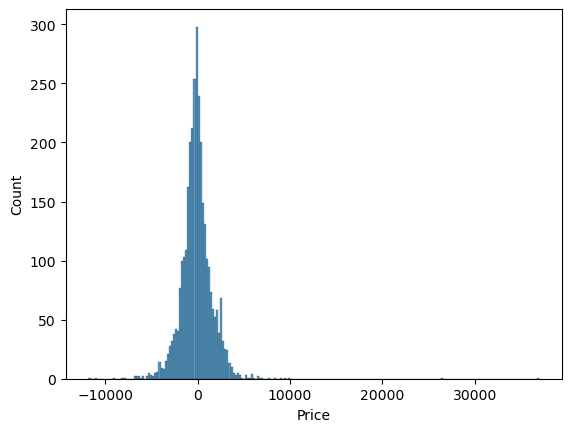

In [217]:
y_pred = lgbm_model.predict(X_test)

mae_xgb = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
print("MAE:", mae_xgb)

mse_xgb = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("MSE: ", mse_xgb)

rmse_xgb = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse_xgb)

r2_xgb = float(format(r2_score(y_test, y_pred), '.3f'))
print("R2: ", r2_xgb)

#Frequency distribution of residual error
sns.histplot(y_test-y_pred)

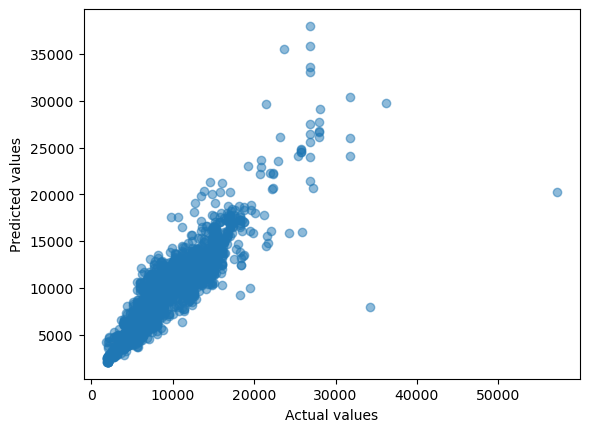

In [218]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [219]:
#Cross Validation
# Define the LightGBM model with explicit num_leaves and max_depth
params = {
    'objective': 'regression',  # Use 'regression' for regression problems
    'metric': 'mse',  # Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,
    'max_depth': 10,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Initialize the LightGBM model
lgbmmodel = lgb.LGBMRegressor(**params)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform cross-validation and get RMSE scores
cv_scores = cross_val_score(lgbmmodel, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = [-(score) for score in cv_scores]
rmse_scores = [np.sqrt(score) for score in mse_scores]

# Display the RMSE scores
print("Cross-Validation RMSE Scores:", rmse_scores)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max

In [220]:
# Display cross-validation results and take the average of the scores
print("Cross-validation RMSE scores:", rmse_scores)
print("Average RMSE:", sum(rmse_scores) / len(rmse_scores))
print("Cross-validation MSE scores:", mse_scores)
mse_cv_lgbm = sum(mse_scores) / len(mse_scores)
print("Average MSE:", mse_cv_xgb)

Cross-validation RMSE scores: [1784.9399048227326, 2306.896662078251, 2544.6747690752422, 1927.2507566896163, 1995.2858370364079]
Average RMSE: 2111.8095859404502
Cross-validation MSE scores: [3186010.463828586, 5321772.209507776, 6475369.680368138, 3714295.479160699, 3981165.5714780786]
Average MSE: 3872372.483957655


In [221]:
#Hyper Paramter Tuning
from sklearn.model_selection import RandomizedSearchCV
params = {
 "learning_rate" : [0.01,0.02,0.04, 0.05,0.06,0.07],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [222]:
lgbm_model_tuned = RandomizedSearchCV(estimator = lgbm_model, param_distributions = params, scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [223]:
lgbm_model_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 5981, number of used features: 28
[LightGBM] [Info] Start training from score 9175.276041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.05, 0.06, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [224]:
lgbm_model_tuned.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.07,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [225]:
y_pred = lgbm_model_tuned.predict(X_test)
mae_lgbm = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
print("MAE:", mae_lgbm)
rmse_lgbm = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("RMSE: ", rmse_lgbm)
mse_lgbm = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("MSE: ", mse_lgbm)
r2_lgbm = float(format(r2_score(y_test, y_pred), '.3f'))
print("R2: ", r2_lgbm)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MAE: 1221.902
RMSE:  1863.873
MSE:  3474024.057
R2:  0.83


In [226]:
#Storing variables in the database to be accessible by other notebooks
%store mse_lgbm mae_lgbm rmse_lgbm r2_lgbm mse_cv_lgbm 


Stored 'mse_lgbm' (float)
Stored 'mae_lgbm' (float)
Stored 'rmse_lgbm' (float)
Stored 'r2_lgbm' (float)
Stored 'mse_cv_lgbm' (float64)


Feed Forward Neural Network


In [227]:
# spiliting the test dataset further into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [228]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [229]:
#This cell takes around 2-3 minutes to run and complete its execution
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from keras import regularizers

# Function to build the FNN
def build_model(neurons_layer1=84, neurons_layer2=28, neurons_layer3=12, optimizer='adam', reg_strength=0.01):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='relu', kernel_initializer='normal', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(reg_strength)))
    model.add(Dense(neurons_layer2, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
    model.add(Dense(neurons_layer3, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create the KerasRegressor
fnn = KerasRegressor(build_fn=build_model, verbose=0)

# Define the hyperparameter space
param_dist = {
    'neurons_layer1': randint(20, 68),
    'neurons_layer2': randint(20, 68),
    'neurons_layer3': randint(20, 68),  
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'reg_strength': uniform(0, 0.1),
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(fnn, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Access the best model from the search
best_model = random_search.best_estimator_


C:\Users\morey\AppData\Local\Temp\ipykernel_29624\2251443629.py:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  fnn = KerasRegressor(build_fn=build_model, verbose=0)
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [-9.53575920e+07 -9.72678027e+07 -9.18750000e+07             nan
             nan -9.19464213e+07             nan -9.74753680e+07
 -9.14156640e+07 -1.01969152e+08]
  warnings.warn(


Best Hyperparameters: {'neurons_layer1': 28, 'neurons_layer2': 58, 'neurons_layer3': 37, 'optimizer': 'adam', 'reg_strength': 0.09656320330745594}


In [230]:
#Creating the new instance of FNN model to explicitely implement early stopping callbacks and learning rate scheduler 
model_2 = Sequential()
model_2.add(Dense(28, activation='relu', kernel_initializer='normal',input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.09656320330745594)))
model_2.add(Dense(58, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.09656320330745594)))
model_2.add(Dense(37, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.09656320330745594)))
model_2.add(Dense(1, kernel_initializer='normal'))

In [231]:
# Compiling the model
model_2.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['mae', 'RootMeanSquaredError'])

In [232]:
# Defining early stopping criteria
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stopping_2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [233]:
# Defining a learning rate scheduler (ReduceLROnPlateau)
lr_scheduler_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)

In [234]:
#This cell takes around 3-5 minutes to run and complete its execution
# Fitting the model with early stopping and learning rate scheduler callbacks
history = model_2.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping_2, lr_scheduler_2]
)

Epoch 1/200
234/234 [==============================] - 1s 4ms/step - loss: 89895712.0000 - mae: 8300.5049 - root_mean_squared_error: 9481.3350 - val_loss: 32306478.0000 - val_mae: 4500.7603 - val_root_mean_squared_error: 5683.8740 - lr: 0.0010
Epoch 2/200
234/234 [==============================] - 1s 4ms/step - loss: 17837158.0000 - mae: 2885.3936 - root_mean_squared_error: 4223.3975 - val_loss: 11464760.0000 - val_mae: 2344.4531 - val_root_mean_squared_error: 3385.9531 - lr: 0.0010
Epoch 3/200
234/234 [==============================] - 1s 3ms/step - loss: 11775130.0000 - mae: 2276.3420 - root_mean_squared_error: 3431.4788 - val_loss: 9824429.0000 - val_mae: 2178.2087 - val_root_mean_squared_error: 3134.3811 - lr: 0.0010
Epoch 4/200
234/234 [==============================] - 1s 3ms/step - loss: 10472743.0000 - mae: 2158.3481 - root_mean_squared_error: 3236.1492 - val_loss: 9178052.0000 - val_mae: 2121.2986 - val_root_mean_squared_error: 3029.5156 - lr: 0.0010
Epoch 5/200
234/234 [=====

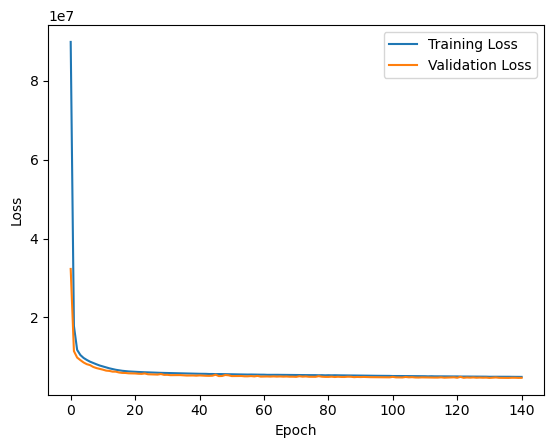

In [235]:
# Plotting training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [236]:
#Computing evaluation metrics (MSE, MAE, RMSE, R2 score) on unseen test set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#'model_2' is the fit model,'X_test_scaled' and 'y_test' are the test set features and target variable
y_test_pred = model_2.predict(X_test_scaled)

mse_fnn = mean_squared_error(y_test, y_test_pred)
mae_fnn = mean_absolute_error(y_test, y_test_pred)
rmse_fnn = np.sqrt(mse_fnn)
r2_fnn = r2_score(y_test, y_test_pred)

print("MSE on Test Set:", mse_fnn)
print("MAE on Test Set:", mae_fnn)
print("RMSE on Test Set:", rmse_fnn)
print("R2 Score on Test Set:", r2_fnn)

51/51 [==============================] - 0s 2ms/step
MSE on Test Set: 4662484.655445795
MAE on Test Set: 1570.4581853208583
RMSE on Test Set: 2159.2787350052317
R2 Score on Test Set: 0.7724278210001516


Cross Validation for FNN

In [237]:
# Building an instance of FNN model inside a function to ease the access to it during the process of the cross validation 
def create_model():
    model = Sequential()
    model.add(Dense(28, activation='relu', kernel_initializer='normal',input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.09656320330745594)))
    model.add(Dense(58, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.09656320330745594)))
    model.add(Dense(37, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.09656320330745594)))
    model.add(Dense(1, kernel_initializer='normal'))

    # Compiling the model
    model.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['mae', 'RootMeanSquaredError'])
    return model

In [238]:
# Concatenate X_train and X_val
combined_X_train = pd.concat([X_train, X_val], axis=0)
# Concatenate y_train and y_val
combined_y_train = pd.concat([y_train, y_val], axis=0)

In [239]:
# Standardizing the features
scaler_2 = StandardScaler()
X_scaled = scaler_2.fit_transform(combined_X_train)
test_scaled = scaler_2.transform(X_test)
y_values = combined_y_train.values

In [ ]:
#This cell takes around 7-8 minutes to run and complete its execution

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initializing the number of folds to 5 (5 fold cross validation)
kfold = KFold(n_splits=5)

# Initializing lists to store MAE, MSE, RMSE and R2 scores for each fold
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kfold.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_val_fold = y_values[train_index], y_values[test_index]

    # Creating a new model instance for each fold
    created_model = create_model()
    
    # Defining EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    
    # Defining a learning rate scheduler (ReduceLROnPlateau)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)
    
    # Fitting the model on the training data for the current fold
    history = created_model.fit(
        X_train_fold, y_train_fold,
        epochs=200,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, lr_scheduler]
    )

 # Computing evaluation metrics for the test set (for the current fold)
    y_val_pred = created_model.predict(test_scaled)
    mae = mean_absolute_error(y_test, y_val_pred)
    mse = mean_squared_error(y_test, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
    r2 = r2_score(y_test, y_val_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
#Computing the mean of evaluation metrics obtained for each fold
mae_cv_fnn= np.mean(mae_scores)
mse_cv_fnn= np.mean(mse_scores)
rmse_cv_fnn= np.mean(rmse_scores)
r2_cv_fnn= np.mean(r2_scores)


Epoch 1/200
227/227 [==============================] - 2s 4ms/step - loss: 92540232.0000 - mae: 8448.5029 - root_mean_squared_error: 9619.7832 - val_loss: 37609536.0000 - val_mae: 5181.3433 - val_root_mean_squared_error: 6132.6577 - lr: 0.0010
Epoch 2/200
227/227 [==============================] - 1s 3ms/step - loss: 21284914.0000 - mae: 3179.8799 - root_mean_squared_error: 4613.5498 - val_loss: 10219068.0000 - val_mae: 2316.9800 - val_root_mean_squared_error: 3196.7144 - lr: 0.0010
Epoch 3/200
227/227 [==============================] - 1s 4ms/step - loss: 13230275.0000 - mae: 2296.5530 - root_mean_squared_error: 3637.3330 - val_loss: 8763874.0000 - val_mae: 2162.1367 - val_root_mean_squared_error: 2960.3699 - lr: 0.0010
Epoch 4/200
227/227 [==============================] - 1s 4ms/step - loss: 12197246.0000 - mae: 2180.0383 - root_mean_squared_error: 3492.4431 - val_loss: 8235011.0000 - val_mae: 2104.6011 - val_root_mean_squared_error: 2869.6560 - lr: 0.0010
Epoch 5/200
227/227 [=====

In [307]:
# Printing the results
print("Mean MAE: %.2f, Mean MSE: %.2f" % (np.mean(mae_scores), np.mean(mse_scores)))
print("Mean RMSE: %.2f, Mean R2 Score: %.2f" % (np.mean(rmse_scores), np.mean(r2_scores)))

Mean MAE: 1560.28, Mean MSE: 4514831.16
Mean RMSE: 2124.36, Mean R2 Score: 0.78


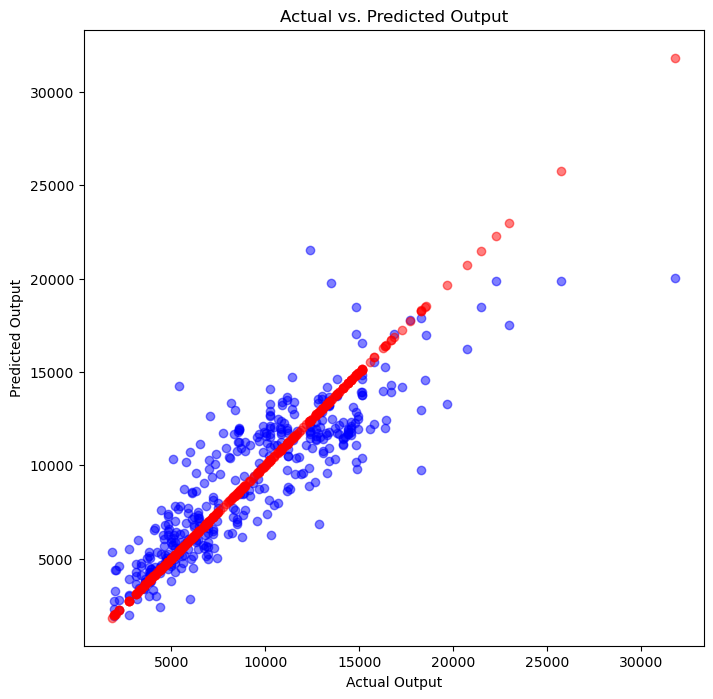

In [308]:
import matplotlib.pyplot as plt

# Creating a scatter plot for actual output versus predicted output (for unseen test set)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, c='blue', label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()


In [309]:
#Making sure the target variable and its predicted values are one dimesional to facilitate plotting of distribution curves
y_actual = y_test.values.flatten()
y_test_pred = y_test_pred.flatten()

C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\morey\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

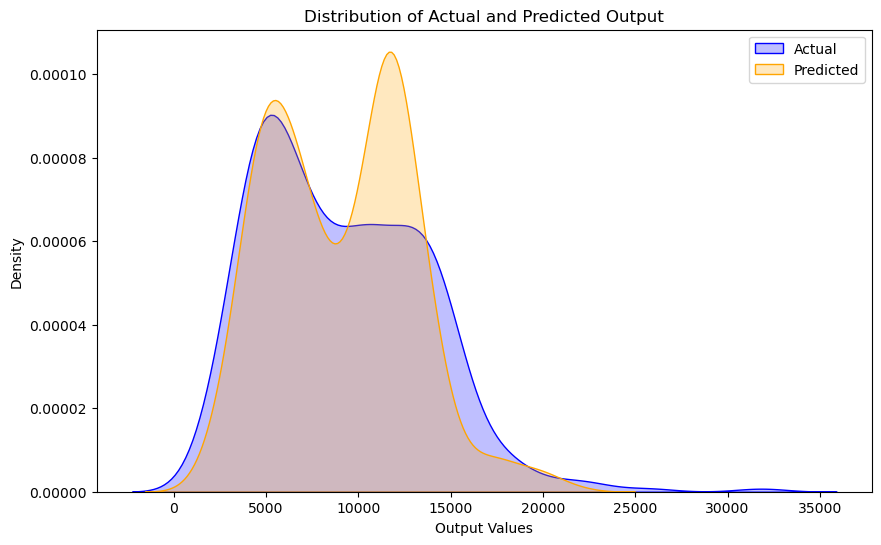

In [310]:
# Creating a DataFrame for easier plotting with seaborn 
df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_test_pred})

# Plotting distribution curves
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Actual', label='Actual', fill=True, color='blue')
sns.kdeplot(data=df, x='Predicted', label='Predicted', fill=True, color='orange')
plt.title('Distribution of Actual and Predicted Output')
plt.xlabel('Output Values')
plt.ylabel('Density')
plt.legend()
plt.show()


In [135]:
#Storing variables in the database to be accessible by other notebooks
%store mse_fnn mae_fnn rmse_fnn r2_fnn mse_cv_fnn mae_cv_fnn rmse_cv_fnn r2_cv_fnn


Stored 'mse_fnn' (float64)
Stored 'mae_fnn' (float64)
Stored 'rmse_fnn' (float64)
Stored 'r2_fnn' (float64)
Stored 'mse_cv_fnn' (float64)
Stored 'mae_cv_fnn' (float64)
Stored 'rmse_cv_fnn' (float64)
Stored 'r2_cv_fnn' (float64)
